In [0]:
try:
  %tensorflow_version 2.x
except EXEPTION:
  pass

import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras

In [44]:
print(tf.__version__)

2.0.0


In [0]:
# Loading the data set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [46]:
X_train[0]
print(y_train.dtype)

uint8


In [0]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_images(data):
  plt.figure(figsize=(15,15))
  plt.title('I mages from cifar10 data')
  for i in range(20):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(data[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[y_train[i][0]])  
  plt.show()

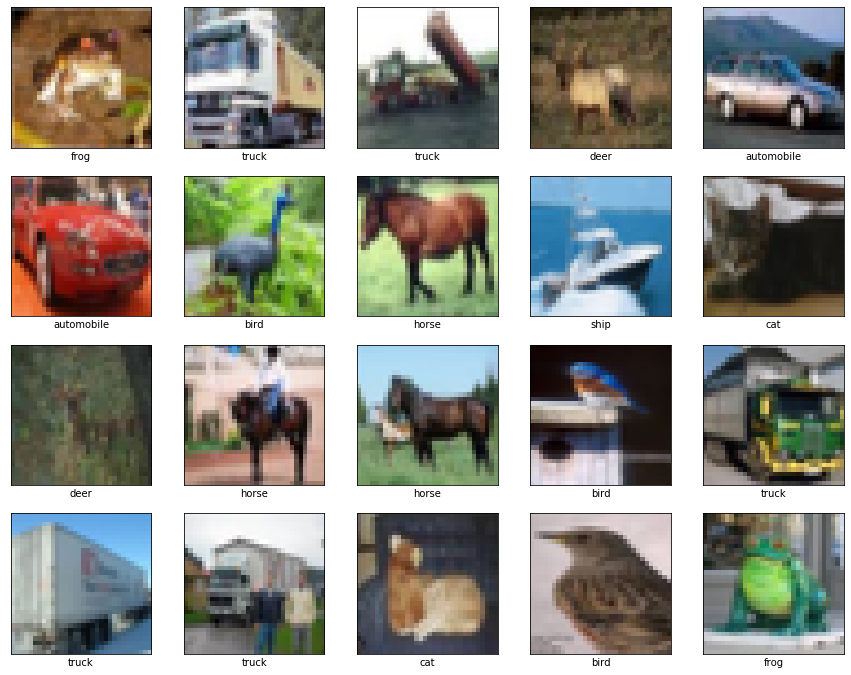

In [64]:
plot_images(X_train)

In [65]:
# Preprocessing the data
# trainind data has 50,000 coloured images
# test data has 10,000 coloured images
print('X train data shape', X_train.shape)
print('X test data shape', X_test.shape)

X_train, X_test = X_train/255.0, X_test/255.0


X train data shape (50000, 32, 32, 3)
X test data shape (10000, 32, 32, 3)


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 64)        

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.6963 - accuracy: 0.7531 - val_loss: 0.8456 - val_accuracy: 0.7096
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.6752 - accuracy: 0.7632 - val_loss: 0.8087 - val_accuracy: 0.7169
Epoch 3/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.6569 - accuracy: 0.7694 - val_loss: 0.8164 - val_accuracy: 0.7216
Epoch 4/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.6442 - accuracy: 0.7742 - val_loss: 0.8503 - val_accuracy: 0.7160
Epoch 5/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.6236 - accuracy: 0.7808 - val_loss: 0.8326 - val_accuracy: 0.7226
Epoch 6/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.6127 - accuracy: 0.7840 - val_loss: 0.8146 - val_accuracy: 0.7228
Epoch 7/10
50000/50000 [==============================] 

Text(0, 0.5, 'Accuracy')

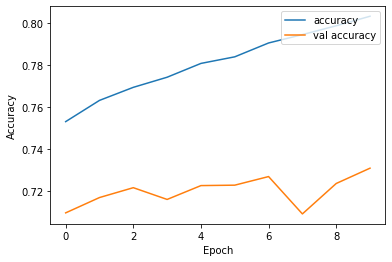

In [84]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [90]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

10000/1 - 4s - loss: 0.6885 - accuracy: 0.7309


In [91]:
print(test_acc)

0.7309
